260


## 必要なライブラリのimport

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import pickle

pd.set_option('display.max_columns', 500)

In [3]:
# 予測したいデータの読み込み

path_test = '../../../../data/extornal/test_processed_clv&churn.csv'

test_all = pd.read_csv(path_test)

# 特徴量の選択
features_all = pd.read_csv('../../../../data/processed/features_52_all.csv')


In [4]:
# 特徴量の選択
pct25 = features_all['importance'].quantile(0.25)
pct50 = features_all['importance'].quantile(0.5)
pct75 = features_all['importance'].quantile(0.75)

上位25％以上

In [6]:
features_selected = features_all.query('importance > @pct25').reset_index(drop=True)
selected_columns = features_selected['feature'].tolist()
selected_columns.insert(0,'card_id')
test = test_all[selected_columns]


## 保存されたモデルを使って予測を行う

In [7]:
n_folds = 5
predictions = np.zeros(len(test))
features = [c for c in test.columns if c not in ['card_id',]]
#categorical_feats = ['feature_1','feature_2', 'feature_3','hist_merchant_category_nu','hist_merchant_category_mode','hist_city_nu','hist_city_mode','hist_state_nu','hist_state_mode','hist_category_1_mod','hist_category_2_mod','hist_category_3_mod','new_merchant_category_nu','new_merchant_category_mode','new_city_nu','new_city_mode','new_state_nu','new_state_mode','new_category_1_mod','new_category_2_mod','new_category_3_mod']


for fold_ in range(n_folds):
    # モデルを読み込む
    with open(f'../src/models/lgb_60_25/model_fold_{fold_}.pkl', 'rb') as f:
        clf = pickle.load(f)
    # モデルで予測を行う
    fold_predictions = clf.predict(test[features])
    # 予測結果を足し合わせる
    predictions += fold_predictions

# 平均を取る
predictions /= n_folds

# RMSEを計算する（テストデータに対して真の値がある場合）
# y_testが存在する場合に限り
if 'y_test' in locals():
    score = mean_squared_error(y_test, predictions, squared=False)
    print(f'RMSE={score}')

In [8]:
# 予測結果を出力する
print(predictions)

[-3.6317271  -0.30971788 -1.29178332 ...  0.84520235 -4.24584668
  0.14586472]


## 提出用ファイルの作成

In [9]:
sub_df = pd.DataFrame({"card_id":test["card_id"].values})
sub_df["target"] = predictions
sub_df.to_csv("../submit_oshikiri_60_25.csv", index=False)

(array([1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 4.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 4.0000e+00, 5.0000e+00, 1.0000e+00, 3.0000e+00,
        6.0000e+00, 7.0000e+00, 4.0000e+00, 1.1000e+01, 8.0000e+00,
        1.5000e+01, 1.0000e+01, 1.7000e+01, 6.0000e+00, 7.0000e+00,
        1.3000e+01, 1.8000e+01, 1.3000e+01, 1.4000e+01, 1.3000e+01,
        2.0000e+01, 1.3000e+01, 2.3000e+01, 2.1000e+01, 2.1000e+01,
        2.4000e+01, 1.9000e+01, 2.5000e+01, 2.3000e+01, 3.8000e+01,
        2.0000e+01, 3.5000e+01, 4.0000e+01, 3.2000e+01, 3.5000e+01,
        3.1000e+01, 3.6000e+01, 4.5000e+01, 4.1000e+01, 5.5000e+01,
        5.2000e+01, 6.4000e+01, 7.9000e+01, 6.1000e+01, 8.6000e+01,
        1.1200e+02, 8.5000e+01, 1.2100e+02, 9.9000e+01, 1.3900e+02,
        1.7500e+02, 1.8100e+02, 2.2200e+02, 2.6400e+02, 2.8300e+02,
        3.6900e+02, 4.3500e+02, 5.2400e+02, 6.0600e+02, 7.8000e+02,
        8.9400e+02, 1.1720e+03, 1.5450e+03, 1.93

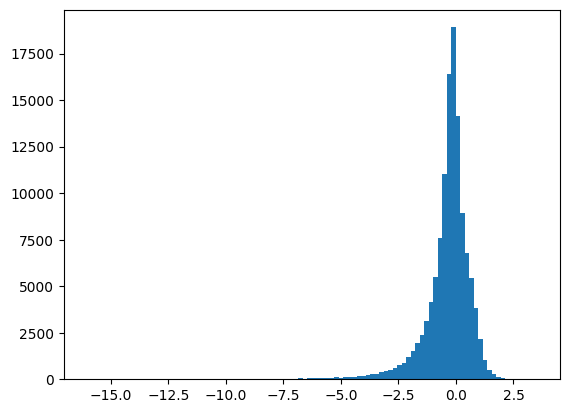

In [10]:
import matplotlib.pyplot as plt
#plt.yscale('log')
plt.hist(sub_df.target, bins=100)
#plt.hist(predictions[predictions<0], bins=100)

上位50％以上

In [11]:
features_selected = features_all.query('importance > @pct50').reset_index(drop=True)
selected_columns = features_selected['feature'].tolist()
selected_columns.insert(0,'card_id')
test = test_all[selected_columns]

In [12]:
n_folds = 5
predictions = np.zeros(len(test))
features = [c for c in test.columns if c not in ['card_id',]]
#categorical_feats = ['feature_1','feature_2', 'feature_3','hist_merchant_category_nu','hist_merchant_category_mode','hist_city_nu','hist_city_mode','hist_state_nu','hist_state_mode','hist_category_1_mod','hist_category_2_mod','hist_category_3_mod','new_merchant_category_nu','new_merchant_category_mode','new_city_nu','new_city_mode','new_state_nu','new_state_mode','new_category_1_mod','new_category_2_mod','new_category_3_mod']


for fold_ in range(n_folds):
    # モデルを読み込む
    with open(f'../src/models/lgb_60_50/model_fold_{fold_}.pkl', 'rb') as f:
        clf = pickle.load(f)
    # モデルで予測を行う
    fold_predictions = clf.predict(test[features])
    # 予測結果を足し合わせる
    predictions += fold_predictions

# 平均を取る
predictions /= n_folds

# RMSEを計算する（テストデータに対して真の値がある場合）
# y_testが存在する場合に限り
if 'y_test' in locals():
    score = mean_squared_error(y_test, predictions, squared=False)
    print(f'RMSE={score}')

In [13]:
# 予測結果を出力する
print(predictions)

[-3.59283894 -0.29734006 -1.2285459  ...  0.86913905 -4.61950261
  0.12443363]


In [14]:
sub_df = pd.DataFrame({"card_id":test["card_id"].values})
sub_df["target"] = predictions
sub_df.to_csv("../submit_oshikiri_60_50.csv", index=False)

(array([3.0000e+00, 6.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 4.0000e+00, 2.0000e+00,
        4.0000e+00, 4.0000e+00, 5.0000e+00, 3.0000e+00, 3.0000e+00,
        5.0000e+00, 9.0000e+00, 1.0000e+01, 7.0000e+00, 1.2000e+01,
        1.4000e+01, 7.0000e+00, 8.0000e+00, 1.6000e+01, 1.4000e+01,
        1.1000e+01, 1.4000e+01, 1.3000e+01, 9.0000e+00, 1.9000e+01,
        2.2000e+01, 2.1000e+01, 2.1000e+01, 1.6000e+01, 2.8000e+01,
        1.6000e+01, 1.8000e+01, 3.2000e+01, 3.0000e+01, 3.4000e+01,
        3.1000e+01, 3.6000e+01, 3.1000e+01, 3.7000e+01, 3.8000e+01,
        3.9000e+01, 2.9000e+01, 3.7000e+01, 5.1000e+01, 5.6000e+01,
        7.1000e+01, 6.0000e+01, 7.1000e+01, 8.0000e+01, 9.9000e+01,
        1.0100e+02, 9.7000e+01, 1.2000e+02, 1.1600e+02, 1.5000e+02,
        1.7700e+02, 2.0600e+02, 2.4800e+02, 2.7000e+02, 3.4900e+02,
        3.9700e+02, 4.7100e+02, 5.6600e+02, 6.7900e+02, 8.3500e+02,
        1.0110e+03, 1.3510e+03, 1.7210e+03, 2.08

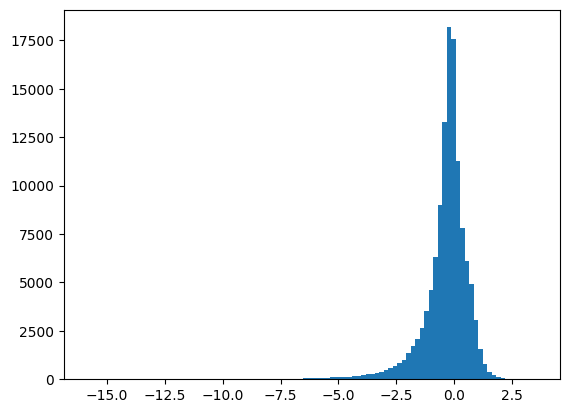

In [15]:
import matplotlib.pyplot as plt
#plt.yscale('log')
plt.hist(sub_df.target, bins=100)
#plt.hist(predictions[predictions<0], bins=100)

上位75％以上

In [16]:
features_selected = features_all.query('importance > @pct75').reset_index(drop=True)
selected_columns = features_selected['feature'].tolist()
selected_columns.insert(0,'card_id')
test = test_all[selected_columns]


In [17]:
n_folds = 5
predictions = np.zeros(len(test))
features = [c for c in test.columns if c not in ['card_id',]]
#categorical_feats = ['feature_1','feature_2', 'feature_3','hist_merchant_category_nu','hist_merchant_category_mode','hist_city_nu','hist_city_mode','hist_state_nu','hist_state_mode','hist_category_1_mod','hist_category_2_mod','hist_category_3_mod','new_merchant_category_nu','new_merchant_category_mode','new_city_nu','new_city_mode','new_state_nu','new_state_mode','new_category_1_mod','new_category_2_mod','new_category_3_mod']


for fold_ in range(n_folds):
    # モデルを読み込む
    with open(f'../src/models/lgb_60_75/model_fold_{fold_}.pkl', 'rb') as f:
        clf = pickle.load(f)
    # モデルで予測を行う
    fold_predictions = clf.predict(test[features])
    # 予測結果を足し合わせる
    predictions += fold_predictions

# 平均を取る
predictions /= n_folds

# RMSEを計算する（テストデータに対して真の値がある場合）
# y_testが存在する場合に限り
if 'y_test' in locals():
    score = mean_squared_error(y_test, predictions, squared=False)
    print(f'RMSE={score}')

In [18]:
# 予測結果を出力する
print(predictions)

[-3.3898978  -0.25633319 -1.27590792 ...  0.93566439 -4.85134978
  0.07177385]


In [19]:
sub_df = pd.DataFrame({"card_id":test["card_id"].values})
sub_df["target"] = predictions
sub_df.to_csv("../submit_oshikiri_60_75.csv", index=False)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 2.0000e+00, 4.0000e+00, 4.0000e+00, 4.0000e+00,
        4.0000e+00, 4.0000e+00, 9.0000e+00, 7.0000e+00, 4.0000e+00,
        7.0000e+00, 7.0000e+00, 9.0000e+00, 1.3000e+01, 8.0000e+00,
        1.3000e+01, 4.0000e+00, 1.3000e+01, 2.3000e+01, 8.0000e+00,
        1.4000e+01, 1.1000e+01, 1.7000e+01, 2.2000e+01, 2.3000e+01,
        2.2000e+01, 1.3000e+01, 2.2000e+01, 2.8000e+01, 2.8000e+01,
        2.4000e+01, 2.7000e+01, 3.9000e+01, 3.9000e+01, 3.3000e+01,
        3.5000e+01, 3.4000e+01, 4.1000e+01, 3.3000e+01, 4.3000e+01,
        6.1000e+01, 5.2000e+01, 4.9000e+01, 5.7000e+01, 5.2000e+01,
        8.1000e+01, 9.5000e+01, 8.5000e+01, 1.0100e+02, 1.1000e+02,
        1.4300e+02, 1.5600e+02, 1.6200e+02, 1.8700e+02, 2.2800e+02,
        2.5400e+02, 3.4400e+02, 4.2200e+02, 4.6500e+02, 6.0600e+02,
        6.6400e+02, 8.6700e+02, 1.0630e+03, 1.43

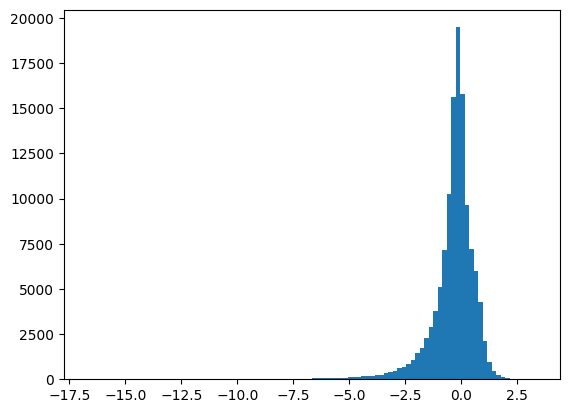

In [20]:
import matplotlib.pyplot as plt
#plt.yscale('log')
plt.hist(sub_df.target, bins=100)
#plt.hist(predictions[predictions<0], bins=100)

In [21]:
# 特徴量の選択
pct30 = features_all['importance'].quantile(0.3)
pct40 = features_all['importance'].quantile(0.4)

In [23]:
features_selected = features_all.query('importance > @pct30').reset_index(drop=True)
selected_columns = features_selected['feature'].tolist()
selected_columns.insert(0,'card_id')
test = test_all[selected_columns]


In [24]:
n_folds = 5
predictions = np.zeros(len(test))
features = [c for c in test.columns if c not in ['card_id',]]
#categorical_feats = ['feature_1','feature_2', 'feature_3','hist_merchant_category_nu','hist_merchant_category_mode','hist_city_nu','hist_city_mode','hist_state_nu','hist_state_mode','hist_category_1_mod','hist_category_2_mod','hist_category_3_mod','new_merchant_category_nu','new_merchant_category_mode','new_city_nu','new_city_mode','new_state_nu','new_state_mode','new_category_1_mod','new_category_2_mod','new_category_3_mod']


for fold_ in range(n_folds):
    # モデルを読み込む
    with open(f'../src/models/lgb_60_30/model_fold_{fold_}.pkl', 'rb') as f:
        clf = pickle.load(f)
    # モデルで予測を行う
    fold_predictions = clf.predict(test[features])
    # 予測結果を足し合わせる
    predictions += fold_predictions

# 平均を取る
predictions /= n_folds

# RMSEを計算する（テストデータに対して真の値がある場合）
# y_testが存在する場合に限り
if 'y_test' in locals():
    score = mean_squared_error(y_test, predictions, squared=False)
    print(f'RMSE={score}')

In [25]:
# 予測結果を出力する
print(predictions)

[-3.75120694 -0.34609868 -1.23659699 ...  0.8860432  -4.34454534
  0.10147764]


In [26]:
sub_df = pd.DataFrame({"card_id":test["card_id"].values})
sub_df["target"] = predictions
sub_df.to_csv("../submit_oshikiri_60_30.csv", index=False)

上位40％以上

In [27]:
features_selected = features_all.query('importance > @pct40').reset_index(drop=True)
selected_columns = features_selected['feature'].tolist()
selected_columns.insert(0,'card_id')
test = test_all[selected_columns]


In [28]:
n_folds = 5
predictions = np.zeros(len(test))
features = [c for c in test.columns if c not in ['card_id',]]
#categorical_feats = ['feature_1','feature_2', 'feature_3','hist_merchant_category_nu','hist_merchant_category_mode','hist_city_nu','hist_city_mode','hist_state_nu','hist_state_mode','hist_category_1_mod','hist_category_2_mod','hist_category_3_mod','new_merchant_category_nu','new_merchant_category_mode','new_city_nu','new_city_mode','new_state_nu','new_state_mode','new_category_1_mod','new_category_2_mod','new_category_3_mod']


for fold_ in range(n_folds):
    # モデルを読み込む
    with open(f'../src/models/lgb_60_40/model_fold_{fold_}.pkl', 'rb') as f:
        clf = pickle.load(f)
    # モデルで予測を行う
    fold_predictions = clf.predict(test[features])
    # 予測結果を足し合わせる
    predictions += fold_predictions

# 平均を取る
predictions /= n_folds

# RMSEを計算する（テストデータに対して真の値がある場合）
# y_testが存在する場合に限り
if 'y_test' in locals():
    score = mean_squared_error(y_test, predictions, squared=False)
    print(f'RMSE={score}')

In [29]:
# 予測結果を出力する
print(predictions)

[-3.59132834 -0.31419281 -1.20758046 ...  0.8678978  -4.38871296
  0.12303485]


In [30]:
sub_df = pd.DataFrame({"card_id":test["card_id"].values})
sub_df["target"] = predictions
sub_df.to_csv("../submit_oshikiri_60_40.csv", index=False)

In [31]:
for i in [26,27]:
    pct = features_all['importance'].quantile(i/100)
    features_selected = features_all.query('importance > @pct').reset_index(drop=True)
    selected_columns = features_selected['feature'].tolist()
    selected_columns.insert(0,'card_id')
    test = test_all[selected_columns]

    n_folds = 5
    predictions = np.zeros(len(test))
    features = [c for c in test.columns if c not in ['card_id',]]


    for fold_ in range(n_folds):
        # モデルを読み込む
        with open(f'../src/models/lgb_60_{i}/model_fold_{fold_}.pkl', 'rb') as f:
            clf = pickle.load(f)
        # モデルで予測を行う
        fold_predictions = clf.predict(test[features])
        # 予測結果を足し合わせる
        predictions += fold_predictions

    # 平均を取る
    predictions /= n_folds
    # 予測結果を出力する
    print(predictions)

    sub_df = pd.DataFrame({"card_id":test["card_id"].values})
    sub_df["target"] = predictions
    sub_df.to_csv(f"../submit_oshikiri_60_{i}.csv", index=False)

[-3.62785453 -0.31073594 -1.20606209 ...  0.85656907 -4.38641111
  0.13061701]
[-3.54927747 -0.31713876 -1.17921014 ...  0.88337884 -4.29239759
  0.1335193 ]
